In [28]:
#Import pandas and get data
#CHANGE FILEPATH TO MATCH LOCATION OF international_matches.csv FROM KAGGLE
import pandas as pd
data = pd.read_csv("C:/Users/joshg/OneDrive/Desktop/DMProject/international_matches.csv")


In [29]:
#Remove unnecessary columns
data = data[["home_team","away_team","home_team_result","date"]]

In [30]:
#Any draws break the winning streak of both teams involved
#Draws perceived as losses by both sides
data.insert(column="away_team_result",loc=3,value="Lose")
data.loc[data["home_team_result"] == "Lose", 'away_team_result'] = 'Win' 
data.loc[data["home_team_result"] == "Draw", 'home_team_result'] = 'Lose'

In [31]:
#Split data to home and away, rename column headers to standardize
awayData = data[["away_team","away_team_result","date"]]
awayData = awayData.rename(columns={"away_team": "team", "away_team_result": "result"})
homeData = data[["home_team","home_team_result","date"]]
homeData = homeData.rename(columns={"home_team": "team", "home_team_result": "result"})

In [32]:
#Create one dataset treating each team separately with team, result, and date
data = pd.concat([homeData,awayData])

#Sort table by team name with each team's matches in chronological order
data = data.sort_values(by = ['team', 'date'], ascending = [True, True])

In [33]:
#Increment streak counter for each consecutive matching value
data['streak'] = data['result'].groupby((data['result'] != data.groupby(['team'])['result'].shift()).cumsum()).cumcount() + 1

#Override all losses to have a streak of 0
data.loc[data["result"] == "Lose", 'streak'] = 0 

In [34]:
#Sort table by team name with each team's win streaks listed highest first
data = data.sort_values(by = ["team", "streak"], ascending = [True, False])

#Drop duplicates based on team name, keeping only first entry which contains highest streak by our previous sorting step
data = data.drop_duplicates(subset="team")

AxesSubplot(0.125,0.125;0.775x0.755)


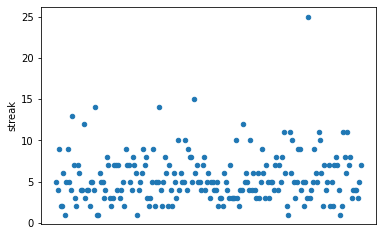

In [35]:
plot = data.plot.scatter('team','streak')
plot.axes.get_xaxis().set_visible(False)

print(plot)


In [36]:
#Sort by streak, highest first
data = data.sort_values(by = ["streak"], ascending = [False])
print("The longest consecutive win streak was " + str(data.iloc[0]['streak']) + " by " + str(data.iloc[0]['team'])
)

print("The average best win streak was "+ '%.2f' % data['streak'].mean())
print("The median best win streak was "+ '%.2f' % data['streak'].median())
print("The most common best win streak was "+ '%.2f' % data['streak'].mode())

The longest consecutive win streak was 25 by Spain
The average best win streak was 5.48
The median best win streak was 5.00
The most common best win streak was 5.00


<AxesSubplot:xlabel='streak', ylabel='count'>

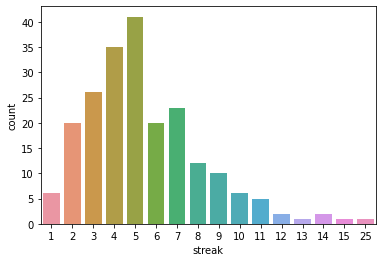

In [37]:
import seaborn as sns
sns.countplot(x=data["streak"])